<img src="random.png">

# Random Forest o Bosque Aleatorios

##### **Integrantes: Camilo Silva - Jaime Beldaño- Camilo Lazo**

Random forest o bosque aleatorio, usa la idea de arboles de desicion para construir sistemas de clasificacion o regresion ensamblando varios arboles de desicion.

Permite establecer una serie de textos condicionales que nos llevan a una salida a partir de las caracteristicas de entrada

Un Random Forest es un conjunto de árboles de decisión combinados con bagging. Al usar bagging, lo que en realidad está pasando, es que distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Esto hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. De esta forma, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor.

Además, al dividir cada nodo durante la construcción de un árbol, la mejor división se encuentra entre todas las entidades de entrada o un subconjunto aleatorio de tamaño max_features.

El propósito de estas dos fuentes de aleatoriedad es disminuir la varianza del estimador forestal. De hecho, los árboles de decisión individuales suelen exhibir una gran variación y tienden a sobreajustarse. La aleatoriedad inyectada en los bosques produce árboles de decisión con errores de predicción algo desacoplados. Al tomar un promedio de esas predicciones, algunos errores pueden cancelarse. Los bosques aleatorios logran una varianza reducida al combinar árboles diversos, a veces a costa de un ligero aumento en el sesgo. En la práctica, la reducción de la varianza suele ser significativa, por lo que genera un mejor modelo general.


## Existen 2 random forest:

Para clasificación: RandomForestClassifier

Para regressión: RandomForestRegressor

## Estos son los hiper-parámetros más útiles:

Propios del Bosque Aleatorio:

**n_estimators**: número de árboles que va a tener el bosque aleatorio. Normalmente cuantos más mejor, pero a partir de cierto punto deja de mejorar y sólo hace que vaya más lento. Un buen valor por defecto puede ser el uso de 100 árboles.

**n_jobs**: número de cores que se pueden usar para entrenar los árboles. Cada árbol es independiente del resto, así que entrenar un bosque aleatorio es una tarea muy paralelizable. Por defecto sólo utiliza 1 core de la CPU. Para mejorar el rendimiento puedes usar tantos cores como estimes necesario. Si usas n_jobs = -1, estás indicando que quieres usar tantos cores como tenga tu máquina.

**max_features**: usa forma de garantizar que los árboles son diferentes, es que todos se entrenan con una muestra aleatoria de los datos. Si queremos que todavía sean más diferentes, podemos hacer que distintos árboles usen distintos atributos. Esto puede ser útil especialmente cuando algunos atributos están relacionados entre sí. Hay varias estrategias para elegir el número máximo de atributos que se pueden usar; mira la documentación para saber más.

**max_depth**: la profundidad máxima del árbol. En los ejemplos anteriores hemos usado max_depth = 2

**min_samples_split**: número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.

**min_samples_leaf**: número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.

**max_leaf_nodes**: número máximo de nodos finales.

**Diccionario**

Bagging: Los métodos de bagging son métodos donde los algoritmos simples son usados en paralelo. El principal objetivo de los métodos en paralelo es el de aprovecharse de la independencia que hay entre los algoritmos simples, ya que el error se puede reducir bastante al promediar las salidas de los modelos simples.

## Ejemplo: Utilizando un dataset de Spotify

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('/Users/camilosilva/Downloads/spotify/data.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [11]:
X = df.drop('liked', axis=1)
y = df['liked']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [17]:
model.score(X, y)

0.9846153846153847

[[19  0]
 [ 0 20]]


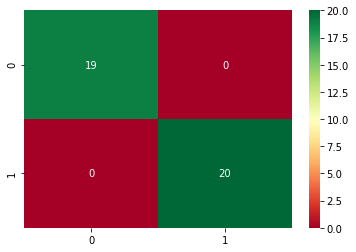

In [25]:
from sklearn import metrics
import seaborn as sns
predictions = model.predict(X_test)
print (metrics.confusion_matrix(y_test, predictions))
sns.heatmap(metrics.confusion_matrix(y_test,predictions), annot=True, cmap='RdYlGn');

In [35]:
df.corr().style.background_gradient(cmap='Blues')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


### **Conclusión: el tempo, la pronunciación y la capacidad de baile están fuertemente correlacionados con los gustos**


<img src="random2.png">

    
https://www.kaggle.com/code/milaplanken/spotify-randomforestclassifier/data

https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

https://www.iartificial.net/ensembles-voting-bagging-boosting-stacking/#Bagging

https://colab.research.google.com/github/jdamaster/machineLearningDiplomat/blob/master/s10_Arboles_y_clustering.ipynb#scrollTo=5XkXxmcUh8LY
